# Linear Algebra Example: 1

In [2]:
#import necessary libraries
import numpy as np
import scipy as sc

In [4]:
#Define the coffieciest matrix A
A = np.array([[1,3,5],[2,5,1],[2,3,8]])

In [5]:
print (A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [6]:
B = np.array([[10],[8],[3]])
print (B)

[[10]
 [ 8]
 [ 3]]


In [8]:
# Calculate the inverse of A and multiply by b to find the solution vector
C = sc.linalg.inv(A).dot(B)

In [9]:
print (C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [10]:
# Alternatively, use the solve function to find the solution vector directly
D = sc.linalg.solve(A, B)

print (D)

[[-9.28]
 [ 5.16]
 [ 0.76]]


# Linear Algebra Example 2:

In [11]:
import numpy as np
import scipy as sc

In [13]:
A = np.array([[3,2],[1,2]])

B = np.array ([1,0])

solution = sc.linalg.solve(A,B)
print (solution)

[ 0.5  -0.25]


# Solving Ordinary Differential Equations (ODE)

In [2]:
# Python program to implement Rungw-Ku Method Function

#Sample equation "dy/dx = (x-y)/z"
def dydx(x,y):
    return ((x-y)/2)
#Find value of y for a given x using stem size h and inital value y0 at x0.
def rungeKutta(x0,y0,x,h):
    n = int((x-x0)/h)
    y = y0
    for i in range (1, n + 1):
        k1 = h * dydx(x0,y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)
        
        y = y + (1.0 / 6.0) *(k1 + 2 * k2 + 2 * k3 + k4)
        
        x0 = x0 + h
    return y

x0 = 0
y = 1
x = 5
h = 0.2
print ('The value of y at x is: ',rungeKutta(x0,y,x,h))

The value of y at x is:  3.246255553543053


# Pressure Profile in a Vessel

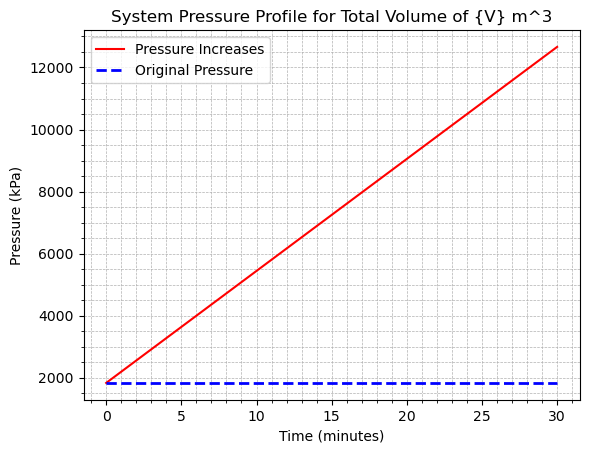

In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

V = 1154 # m^3
R = 8.314 # R[J/(mol*K)]
T = 120 # °C

mass_in = 473220 # kg/h
MW_in = 56.6
mass_out = 28742 # kg/h
MW_out = 40.4

#Calculate time in min
Tk = T + 273.15
mol_in = mass_in/MW_in/60
mol_out = mass_out/MW_out/60

P0 =1830

def dPdt(P, t):
    dpdt = (mol_in - mol_out)/(V/(R*Tk))
    return dpdt

#Create the x axis for the integration
start = 0
end = 30
t = np.linspace(start, end, end)
Pinitial = np.linspace(P0, P0, end)

P = sc.integrate.odeint (dPdt, P0, t)

plt.figure()
plt.plot(t,P, 'r', label='Pressure Increases')
plt.plot(t, Pinitial, 'b--', label='Original Pressure', linewidth=2)
plt.title('System Pressure Profile for Total Volume of {V} m^3')
plt.xlabel ('Time (minutes)')
plt.ylabel ('Pressure (kPa)')
plt.grid(True, which='Both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()


# Modeling a Zombie Apocalypse

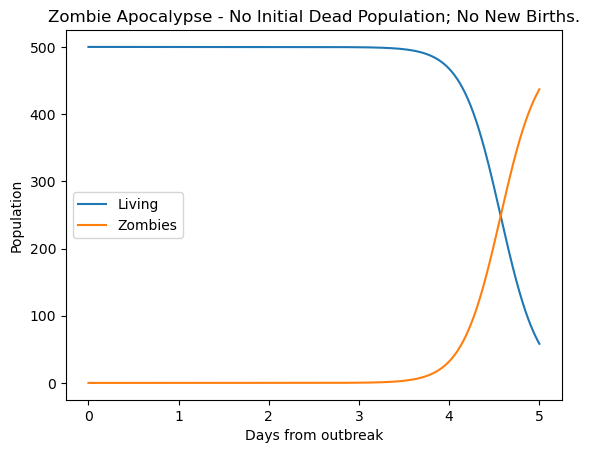

In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Parameters for the mpdel. representing various rates per day
P = 0
d = 0.0001
B = 0.0095
G = 0.0001
A = 0.0001

def f(y, t):
    Si = y[0] 
    Zi = y[1]
    Ri = y[2]
    
    f0 = P - B * Si * Zi - d * Si # Rate of change of living
    f1 = B * Si * Zi + G * Ri - A * Si * Zi # Rate of change of zombies
    f2 = d * Si + A * Si * Zi - G * Ri # Rate of change of dead
    return [f0, f1, f2]

# Initial conditions for the model
S0 = 500.0 
Z0 = 0 
R0 = 0 
y0 = [S0, Z0, R0] 
t = np.linspace(0, 5., 1000) 

# Solving the differential equations over time t, starting from initial conditions y0
soln = sc.integrate.odeint(f, y0, t)
S = soln[:, 0] # Extracting the solution for living
Z = soln[:, 1] # Extracting the solution for zombies
R = soln[:, 2] # Extracting the solution for dead
# Plotting the results for the initial scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()

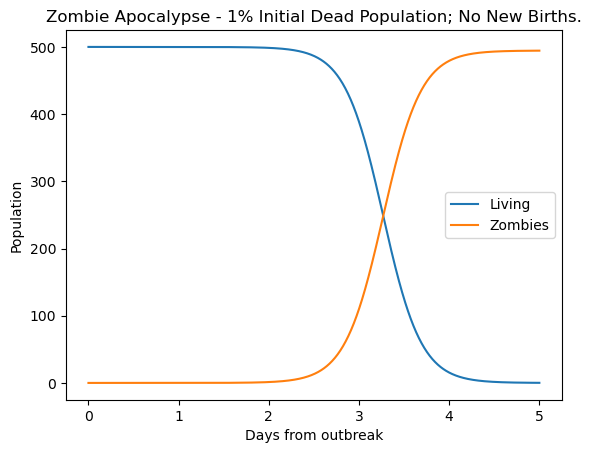

In [6]:
# Changing the initial conditions for a scenario with 1% initial dead population
R0 = 0.01 * S0 # 1% of the initial population is dead
y0 = [S0, Z0, R0] # Updating the initial conditions
soln = sc.integrate.odeint(f, y0, t) # Solving the DEs again with new initial conditi
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]
# Plotting the results for the second scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()

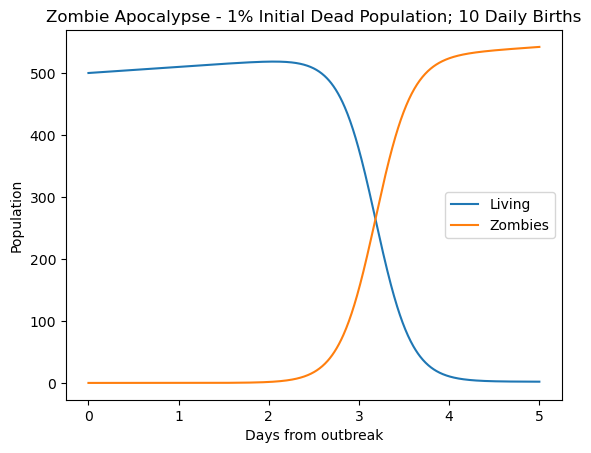

In [7]:
# Updating the parameters for the third scenario with daily births
P = 10 # 10 new births daily
y0 = [S0, Z0, R0] # Initial conditions remain the same as the second scenario
soln = sc.integrate.odeint(f, y0, t) # Solving the DEs with the new birth rate
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]
# Plotting the results for the third scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; 10 Daily Births')
plt.legend(loc=0)
plt.show()